<a href="https://colab.research.google.com/github/Mittra19/K-SVD/blob/main/Dictionary_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.linear_model import OrthogonalMatchingPursuit

In [2]:
#Import data
from sklearn import datasets
digits = datasets.load_digits()

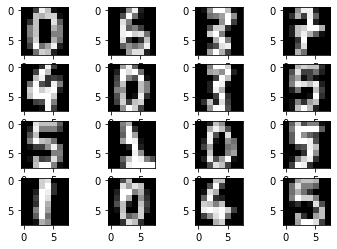

In [ ]:
#Display data
import random
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, 4)
for i in range(4):
  for j in range(4):
    k = random.randint(0, digits.data.shape[0])
    dg = digits.data[k].reshape(8, 8)
    axs[i, j].imshow(dg, cmap='gray')

plt.show()

In [3]:
#Sparse Coding Stage
def sparse_encode(A, Y, n_nonzero_coefs , fit_intercept, normalize):
  omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs, fit_intercept= fit_intercept, normalize= normalize)
  omp.fit(A, Y)
  coef = omp.coef_
  return coef

In [4]:
#Dictionary Update Stage
tol = 1e-6 #tolerance
max_iter = 10 #maximum number of iteration
n_components = 500 #Number of atoms in the dictionary
n_nonzero_coefs = 0

In [ ]:
def update_dict(A, coef):
  #print("shape: ",A.shape[1])
  for j in range(A.shape[1]):
    #Define Sigma_j0 that use the atom a_j0
    Sigma_j0 = np.where(coef[j, :]!=0)[0]
    #print("Sigma_j0: ", Sigma_j0[0], " length: ",Sigma_j0[0])
    if len(Sigma_j0) == 0:
      print("len of Sigma_j0 is 0")
      continue
    #Compute the residual matrix E_j0
    #E_j0 = normalize(digits.data.T, axis=0, norm='l2') - np.dot(A, coef.T)
    #Restrict E_j0 by choosing only the columns corresponding to Sigma_j0 and obtain Er_j0
    Er_j0 = coef[:, Sigma_j0]#E_j0[:, Sigma_j0]
    Er_j0[j, :] = 0
    Error = digits.data.T(:, Sigma_j0) - np.dot(A,Er_j0.T)
    #Apply SVD Er_j0 = U*D*V.T. Update the dictionary atom a_j0 = u1 and the representations by xR_j0 = D[1, 1].v1
    U, S, Vh = np.linalg.svd(Error)
    #print("shape: ",U[:, 0, None].shape)
    #print("shape: ",A[:, j, None].shape)
    A[:, j, None] = U[:, 0, None]
    #print("coef[j, Sigma_j0]: ",coef[j, Sigma_j0], "sigma_j0: ", Sigma_j0)
    print("Vh[0, :]: ",Vh[0, :].shape, "S[0]: ", S[0], " coef[j, Sigma_j0]: ", coef[j, Sigma_j0][0].shape)
    coef[j, Sigma_j0] = S[0]*Vh[0, :]
    #print(np.linalg.norm(E_j0))
    if(np.linalg.norm(E_j0)<tol):
      break
  return A, coef, np.linalg.norm(E_j0)

SyntaxError: ignored

In [ ]:
#Dictionary initialisation
k = 0
M = 500 #Choose the value of M, i.e. the number of features/
A = np.array(digits.data[:M, :].T)
error = []
#print(A.shape)
A = normalize(A, axis=0, norm='l2') #Normalise the columns of the matrix
#print(A)
#for i in range(1, 50):
#  er = 0
for k in range(2):
  x = sparse_encode(A = A, Y = normalize(digits.data.T, axis=0, norm='l2'), n_nonzero_coefs = 4, fit_intercept= False, normalize= False)
  A, x, err = update_dict(A, x)
  #er = err + er
#er = er/i
error.append(err)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


ValueError: ignored